# # 필요한 라이브러리

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## ## 구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ## 이미지 불러오기

In [ ]:
from IPython.display import Image

# [다중 분류]
  * 이 절에서 로이터 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 신경망을 만들어 보겠습니다. 클래스가 많기 때문에 이 문제는 다중 분류의 예입니다. 각 데이터 포인트가 정확히 하나의 범주로 분류되기 때문에 좀 더 정확히 말하면 단일 레이블 다중 분류 문제입니다. 각 데이터 포인트가 여러 개의 범주(가령, 토픽)에 속할 수 있다면 이런 문제는 다중 레이블 다중 분류의 문제가 됩니다.

# # 데이터 불러오기
  * num_words=10000
    - 가장 자주 등장하는 단어 1만 개로 제한

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


## ## 데이터 형태

### ### 피처 데이터

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

### ### 레이블 데이터

In [ ]:
train_labels, train_labels.shape

(array([ 3,  4,  3, ..., 25,  3, 25]), (8982,))

## ## 원래 데이터 형태로

In [ ]:
word_index = reuters.get_word_index()
word_index

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [ ]:
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

# # 데이터를 벡터로 변환
  * 레이블을 벡터로 바꾸는 방법은 두 가지입니다. 
    - 레이블의 리스트를 정수 텐서로 변환하는 것과 
    - 원-핫 인코딩을 사용하는 것입니다. 
      + 원-핫 인코딩이 범주형 데이터에 널리 사용되기 때문에 범주형 인코딩이라고도 부릅니다.
      + 원-핫 인코딩에 대한 자세한 설명은 6.1절을 참고하세요. 이 경우 레이블의 원-핫 인코딩은 각 레이블의 인덱스 자리는 1이고 나머지는 모두 0인 벡터입니다:

## ## 정수 텐서로 변환

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [ ]:
x_train.shape

(8982, 10000)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
df_x_train = pd.DataFrame(x_train)
df_x_train

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8977,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8978,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8979,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8980,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## ## 원핫인코딩

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df_one_hot_train_labels = pd.DataFrame(one_hot_train_labels)
df_one_hot_train_labels

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8980,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### ### 케라스에 내장함수로 원핫인코딩

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# # 모델 구성
  * 마지막 Dense 층의 크기가 46입니다. 각 입력 샘플에 대해서 46차원의 벡터를 출력한다는 뜻입니다. 이 벡터의 각 원소(각 차원)은 각기 다른 출력 클래스가 인코딩된 것입니다.
  * 마지막 층에 softmax 활성화 함수가 사용되었습니다. MNIST 예제에서 이런 방식을 보았습니다. 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력합니다. 
    - 즉, 46차원의 출력 벡터를 만들며 output[i]는 어떤 샘플이 클래스 i에 속할 확률입니다. 46개의 값을 모두 더하면 1이 됩니다.
    - [softmax 이해](https://wikidocs.net/35476)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

## ## categorical_crossentropy
  * 이런 문제에 사용할 최선의 손실 함수는 categorical_crossentropy입니다. 이 함수는 두 확률 분포의 사이의 거리를 측정합니다. 여기에서는 네트워크가 출력한 확률 분포와 진짜 레이블의 분포 사이의 거리입니다. 두 분포 사이의 거리를 최소화하면 진짜 레이블에 가능한 가까운 출력을 내도록 모델을 훈련하게 됩니다.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## ## 훈련 검증
  * 훈련 데이터에서 1,000개의 샘플을 따로 떼어서 검증 세트로 사용하겠습니다:

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 57ms/step - loss: 2.5815 - accuracy: 0.5264 - val_loss: 1.6946 - val_accuracy: 0.6530
Epoch 2/20
16/16 [==============================] - 1s 42ms/step - loss: 1.3959 - accuracy: 0.7082 - val_loss: 1.2753 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 1s 42ms/step - loss: 1.0394 - accuracy: 0.7772 - val_loss: 1.1091 - val_accuracy: 0.7650
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 0.8182 - accuracy: 0.8265 - val_loss: 1.0192 - val_accuracy: 0.7900
Epoch 5/20
16/16 [==============================] - 1s 42ms/step - loss: 0.6465 - accuracy: 0.8634 - val_loss: 0.9530 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 1s 41ms/step - loss: 0.5139 - accuracy: 0.8910 - val_loss: 0.9258 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 1s 41ms/step - loss: 0.4120 - accuracy: 0.9151 - val_loss: 0.9118 - val_accuracy: 0.8130
Epoch 8/20
16

### ### 손실과 정확도 곡선 시각화

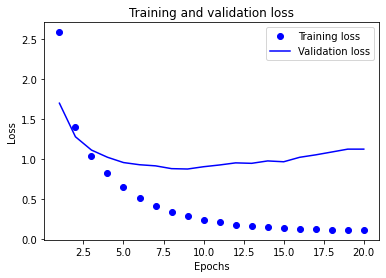

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

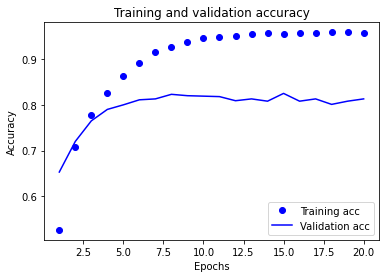

In [ ]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### #### 해석
  * 이 모델은 9번째 에포크 이후에 과대적합이 시작됩니다. 9번의 에포크로 새로운 모델을 훈련하고 테스트 세트에서 평가하겠습니다:

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 52ms/step - loss: 2.6838 - accuracy: 0.5103 - val_loss: 1.7921 - val_accuracy: 0.6150
Epoch 2/9
16/16 [==============================] - 1s 44ms/step - loss: 1.4921 - accuracy: 0.6898 - val_loss: 1.3418 - val_accuracy: 0.7150
Epoch 3/9
16/16 [==============================] - 1s 41ms/step - loss: 1.0961 - accuracy: 0.7648 - val_loss: 1.1445 - val_accuracy: 0.7560
Epoch 4/9
16/16 [==============================] - 1s 42ms/step - loss: 0.8547 - accuracy: 0.8170 - val_loss: 1.0506 - val_accuracy: 0.7820
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 0.6749 - accuracy: 0.8577 - val_loss: 0.9610 - val_accuracy: 0.8020
Epoch 6/9
16/16 [==============================] - 1s 42ms/step - loss: 0.5410 - accuracy: 0.8885 - val_loss: 0.9318 - val_accuracy: 0.8120
Epoch 7/9
16/16 [==============================] - 1s 42ms/step - loss: 0.4320 - accuracy: 0.9118 - val_loss: 0.8978 - val_accuracy: 0.8160
Epoch 8/9
16/16 [===

## ## 무작위로 데이터셋을 분류해서 다시 실행
  * 대략 78%의 정확도를 달성했습니다. 균형 잡힌 이진 분류 문제에서 완전히 무작위로 분류하면 50%의 정확도를 달성합니다.
  * 이 문제는 불균형한 데이터셋을 사용하므로 무작위로 분류하면 19% 정도를 달성합니다. 여기에 비하면 이 결과는 꽤 좋은 편입니다:

In [ ]:
import copy

test_labels_copy = copy.copy(test_labels)

np.random.shuffle(test_labels_copy)

float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18655387355298308

# # 새로운 데이터로 예측
  * predict 메서드는 46개 토픽에 대한 확률 분포를 반환합니다. 

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

1.0

## ## 분류 결과
  * 가장 큰 값이 예측 클래스가 됩니다. 즉, 가장 확률이 높은 클래스입니다:

In [ ]:
np.argmax(predictions[0])

3

# # 레이블 데이터 형태를 정수 텐서로 변환하는 방법으로 훈련
  * 이 방식을 사용하려면 손실 함수 하나만 바꾸면 됩니다. 코드 3-21에 사용된 손실 함수 categorical_crossentropy는 레이블이 범주형 인코딩되어 있을 것이라고 기대합니다. 정수 레이블을 사용할 때는 sparse_categorical_crossentropy를 사용해야 합니다:

In [44]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [45]:
model.compile(optimizer='rmsprop'
              , loss='sparse_categorical_crossentropy'
              , metrics=['acc'])

# # 충분히 큰 중간층을 두어야 하는 이유
  * 앞서 언급한 것처럼 마지막 출력이 46차원이기 때문에 중간층의 히든 유닛이 46개보다 많이 적어서는 안 됩니다. 46차원보다 훨씬 작은 중간층(예를 들면 4차원)을 두면 정보의 병목이 어떻게 나타나는지 확인해 보겠습니다.

In [47]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 17ms/step - loss: 3.0847 - accuracy: 0.1998 - val_loss: 2.4327 - val_accuracy: 0.4490
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 1.9506 - accuracy: 0.4959 - val_loss: 1.7181 - val_accuracy: 0.5420
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 1.3371 - accuracy: 0.6937 - val_loss: 1.3288 - val_accuracy: 0.6840
Epoch 4/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0779 - accuracy: 0.7347 - val_loss: 1.2496 - val_accuracy: 0.7010
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 0.9597 - accuracy: 0.7486 - val_loss: 1.2259 - val_accuracy: 0.7000
Epoch 6/20
63/63 [==============================] - 1s 14ms/step - loss: 0.8718 - accuracy: 0.7622 - val_loss: 1.2418 - val_accuracy: 0.7030
Epoch 7/20
63/63 [==============================] - 1s 15ms/step - loss: 0.7988 - accuracy: 0.7823 - val_loss: 1.2267 - val_accuracy: 0.7150
Epoch 8/20
63

## ## 결과
  * 검증 정확도의 최고 값은 약 71%로 8% 정도 감소되었습니다. 이런 손실의 대부분 원인은 많은 정보(46개 클래스의 분할 초평면을 복원하기에 충분한 정보)를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문입니다. 이 네트워크는 필요한 정보 대부분을 4차원 표현 안에 구겨 넣었지만 전부는 넣지 못했습니다.